# Lifespan Health AI Workshop
### AI and Machine Learning for time series medical signal analysis

This notebook requires python and the Aeon package installed. Information regarding the install of Aeon can be found at https://www.aeon-toolkit.org/en/stable/installation.html

The first step is to import the necessary functions in python

In [2]:
from aeon.datasets import load_from_ts_file
from sklearn.model_selection import train_test_split
import numpy as np

Next we load the dataset into python. The dataset is stored as a .ts file, a common way to store time series based data composed of comma seperated values with colons seperating channels and class values on the end of each. The data is loaded into numpy arrays. You may need to update the data path to point to the location on your pc where you have the dataset folder.

In [ ]:
#We provide both ButtonPress and LeftRightHand preformatted to be used
dataset="ButtonPress.ts"
data_path="./dataset/"
X,y = load_from_ts_file(data_path+dataset)

We can view the shape of the dataset using numpy, and plot a single time series using matplotlib.

(80, 32, 1000)


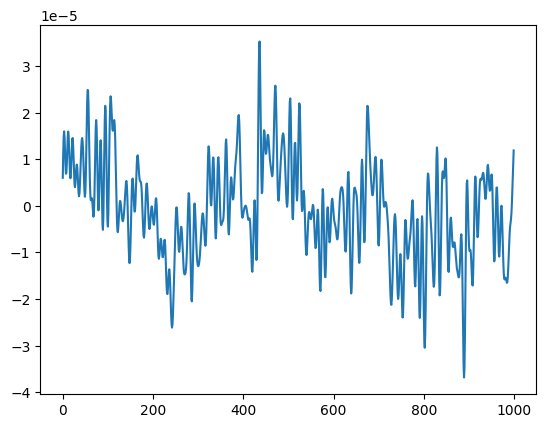

In [4]:
print(np.shape(X))
import matplotlib.pyplot as plt
plt.plot(X[0][0])
plt.show()

The next step is to split the dataset into two sections, the first being the section of the data we will train the model on, and the second what we use to evaluate its performance.

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)
print(np.shape(X_train))
print(np.shape(X_test))

(40, 32, 1000)
(40, 32, 1000)


Next we can import and train our selected classifier. In this case we use the KNearestNeighbour classifier, which uses the distance between series to classify.

In [6]:
from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier
classifier = KNeighborsTimeSeriesClassifier()
classifier.fit(X_train,y_train)

KNeighborsTimeSeriesClassifier()

The final step is to evalute the classifier performance on the unseen test set. We can use the trained model to predict a class value from each instance and compare them to the actual value to calculate an accuracy.

In [7]:
print(classifier.score(X_test,y_test))

0.675


#### Comparing Classifiers

We can also compare results for different classifiers to see how effective each might be. We start by importing some different models.

In [8]:
from aeon.classification.convolution_based import MiniRocketClassifier,MultiRocketHydraClassifier
from aeon.classification.interval_based import DrCIFClassifier,IntervalForestClassifier
from aeon.classification.feature_based import Catch22Classifier
from aeon.classification.dictionary_based import MUSE

classifiers = { "KNN":KNeighborsTimeSeriesClassifier(),
                "MiniROCKET":MiniRocketClassifier(),
                "Catch22":Catch22Classifier(),
                "MUSE":MUSE(),
                "IntervalForest":IntervalForestClassifier()
                }

We can then iterate though each classifier, fit each model and predict to calculate its performance. This make take a few minutes to run with some of the longer classifiers.

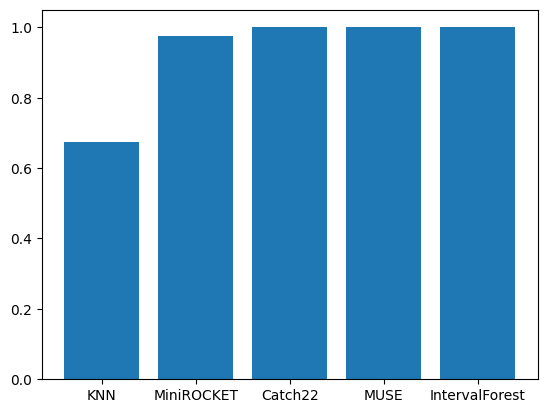

In [9]:
accuracies = []
for name, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    accuracies.append(classifier.score(X_test,y_test))
plt.bar(x=classifiers.keys(),height=accuracies)
plt.show()

The summerises everything you need to know to run a basic classification experiment using Aeon with time series data. However if you wish to learn more Aeon provided a number of more detailed notebooks going through a number of different problems and uses. These can be accessed at https://github.com/aeon-toolkit/aeon/tree/main/examples